# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [32]:
import numpy as np
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

## Analytical solution

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

Steady state for the RCK model

In [35]:
import sympy as sp

# Define symbols
K, c, alpha, rho, theta, delta, n, L = sp.symbols('K c alpha rho theta delta n L')
lam = sp.symbols('lambda')  # Shadow price of capital

# Production function
Y = K**alpha * L**(1 - alpha)

# Hamiltonian
H = (c**(1 - theta) / (1 - theta)) + lam * (Y - c * L - delta * K)

# First order conditions
foc_K = sp.diff(H, K)
foc_c = sp.diff(H, c)
foc_lambda = sp.diff(H, lam)

# Solve for steady state where time derivatives are zero
steady_state = sp.solve((foc_c, foc_K, foc_lambda), (K, c, lam), dict=True)

# Display the steady state solutions
print("Steady State Solutions:")
for sol in steady_state:
    print(f"Capital (K*): {sol[K]}, Consumption (c*): {sol[c]}, Lambda (λ*): {sol[lam]}")


Steady State Solutions:
Capital (K*): (L**(1 - alpha)*alpha/delta)**(-1/(alpha - 1)), Consumption (c*): ((L*alpha/(L**alpha*delta))**(-1/(alpha - 1)))**alpha/L**alpha - delta/(L*(L*alpha/(L**alpha*delta))**(1/(alpha - 1))), Lambda (λ*): 1/(L*(((L**(1 - alpha)*alpha/delta)**(-1/(alpha - 1)))**alpha/L**alpha - delta/(L*(L**(1 - alpha)*alpha/delta)**(1/(alpha - 1))))**theta)


## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

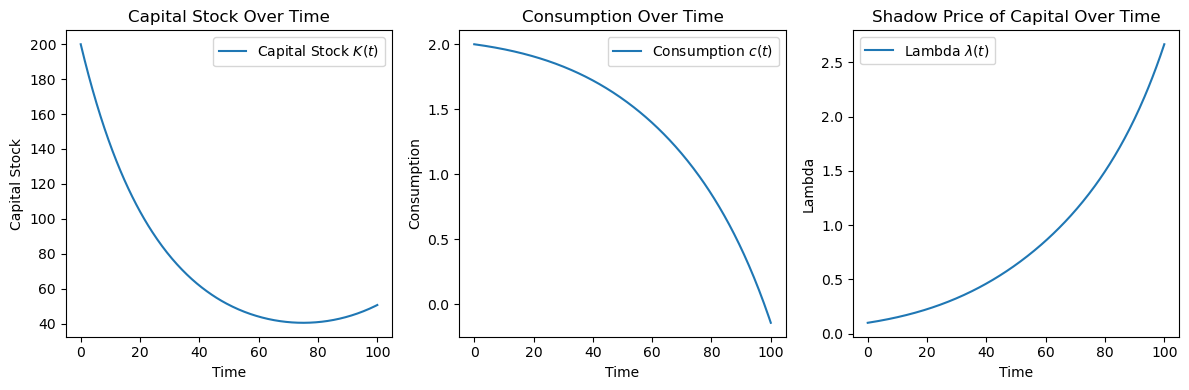

In [40]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
alpha = 0.3   # Output elasticity of capital
delta = 0.05  # Depreciation rate of capital
rho = 0.02    # Rate of time preference
theta = 2.0   # Coefficient of relative risk aversion
n = 0.01      # Labor growth rate

# Production function
def production(K):
    return K**alpha

# Differential equations from Hamiltonian
def rck_system(t, z):
    K, c, lam = z
    Y = production(K)
    dot_K = Y - c - delta * K
    dot_c = (lam / theta) * (alpha * Y / K - rho - delta)
    dot_lam = -lam * ((alpha * Y / K) - delta)
    return [dot_K, dot_c, dot_lam]

# Initial conditions
initial_conditions = [200, 2, 0.1]  # Initial capital, consumption, lambda

# Time span for the simulation
t_span = (0, 100)
t_eval = np.linspace(*t_span, 300)

# Solve the differential equations
solution = solve_ivp(rck_system, t_span, initial_conditions, t_eval=t_eval, method='BDF')

# Plotting results
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(solution.t, solution.y[0], label='Capital Stock $K(t)$')
plt.title('Capital Stock Over Time')
plt.xlabel('Time')
plt.ylabel('Capital Stock')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(solution.t, solution.y[1], label='Consumption $c(t)$')
plt.title('Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Consumption')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(solution.t, solution.y[2], label='Lambda $\lambda(t)$')
plt.title('Shadow Price of Capital Over Time')
plt.xlabel('Time')
plt.ylabel('Lambda')
plt.legend()

plt.tight_layout()
plt.show()


# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Changes of parameter values - sensitivity analysis

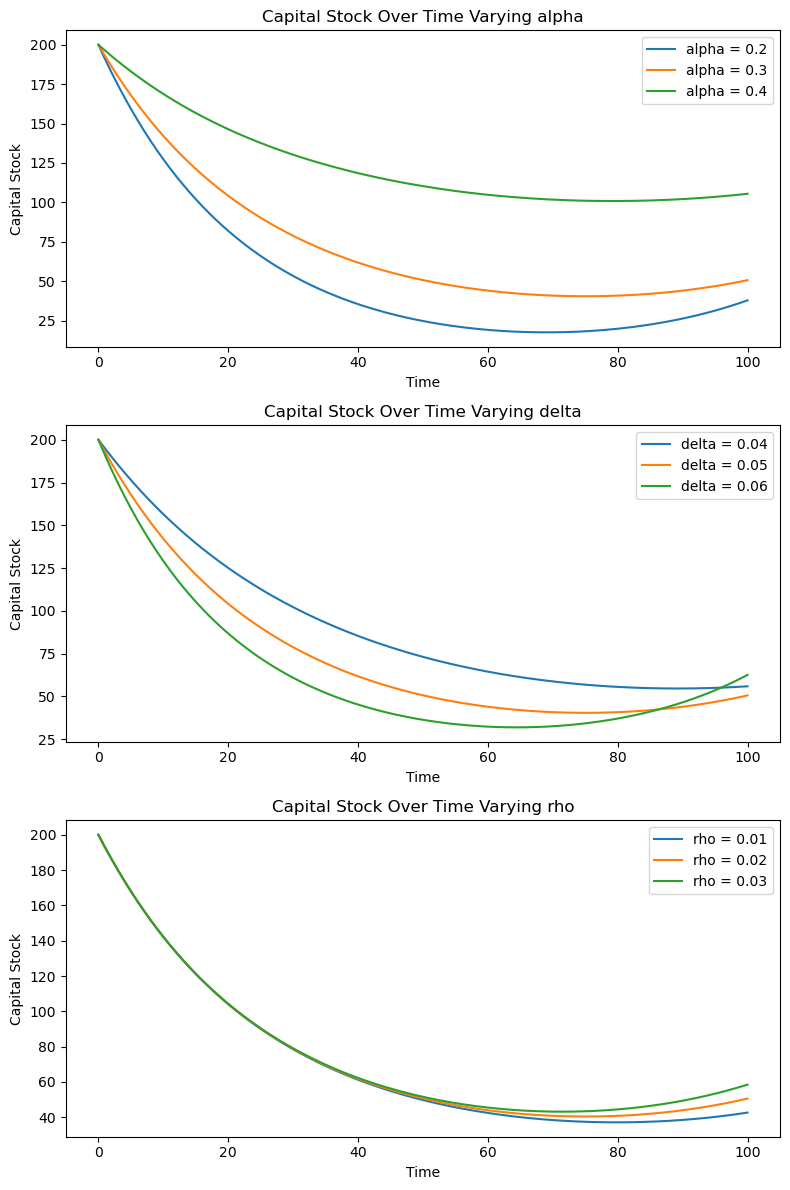

In [41]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
base_params = {
    'alpha': 0.3,
    'delta': 0.05,
    'rho': 0.02,
    'theta': 2.0,
    'n': 0.01
}

# Production function
def production(K, alpha):
    return K**alpha

# Differential equations from Hamiltonian
def rck_system(t, z, alpha, delta, rho, theta):
    K, c, lam = z
    Y = production(K, alpha)
    dot_K = Y - c - delta * K
    dot_c = (lam / theta) * (alpha * Y / K - rho - delta)
    dot_lam = -lam * ((alpha * Y / K) - delta)
    return [dot_K, dot_c, dot_lam]

# Initial conditions
initial_conditions = [200, 2, 0.1]  # Initial capital, consumption, lambda

# Time span for the simulation
t_span = (0, 100)
t_eval = np.linspace(*t_span, 300)

# Creating a plot
fig, ax = plt.subplots(3, 1, figsize=(8, 12))

# Parameter variations
for idx, (param, values) in enumerate({'alpha': [0.2, 0.3, 0.4], 'delta': [0.04, 0.05, 0.06], 'rho': [0.01, 0.02, 0.03]}.items()):
    for value in values:
        params = base_params.copy()
        params[param] = value
        solution = solve_ivp(rck_system, t_span, initial_conditions, args=(params['alpha'], params['delta'], params['rho'], params['theta']), t_eval=t_eval, method='BDF')
        ax[idx].plot(solution.t, solution.y[0], label=f'{param} = {value}')
    ax[idx].set_title(f'Capital Stock Over Time Varying {param}')
    ax[idx].set_xlabel('Time')
    ax[idx].set_ylabel('Capital Stock')
    ax[idx].legend()

plt.tight_layout()
plt.show()


# Extension with technological growth

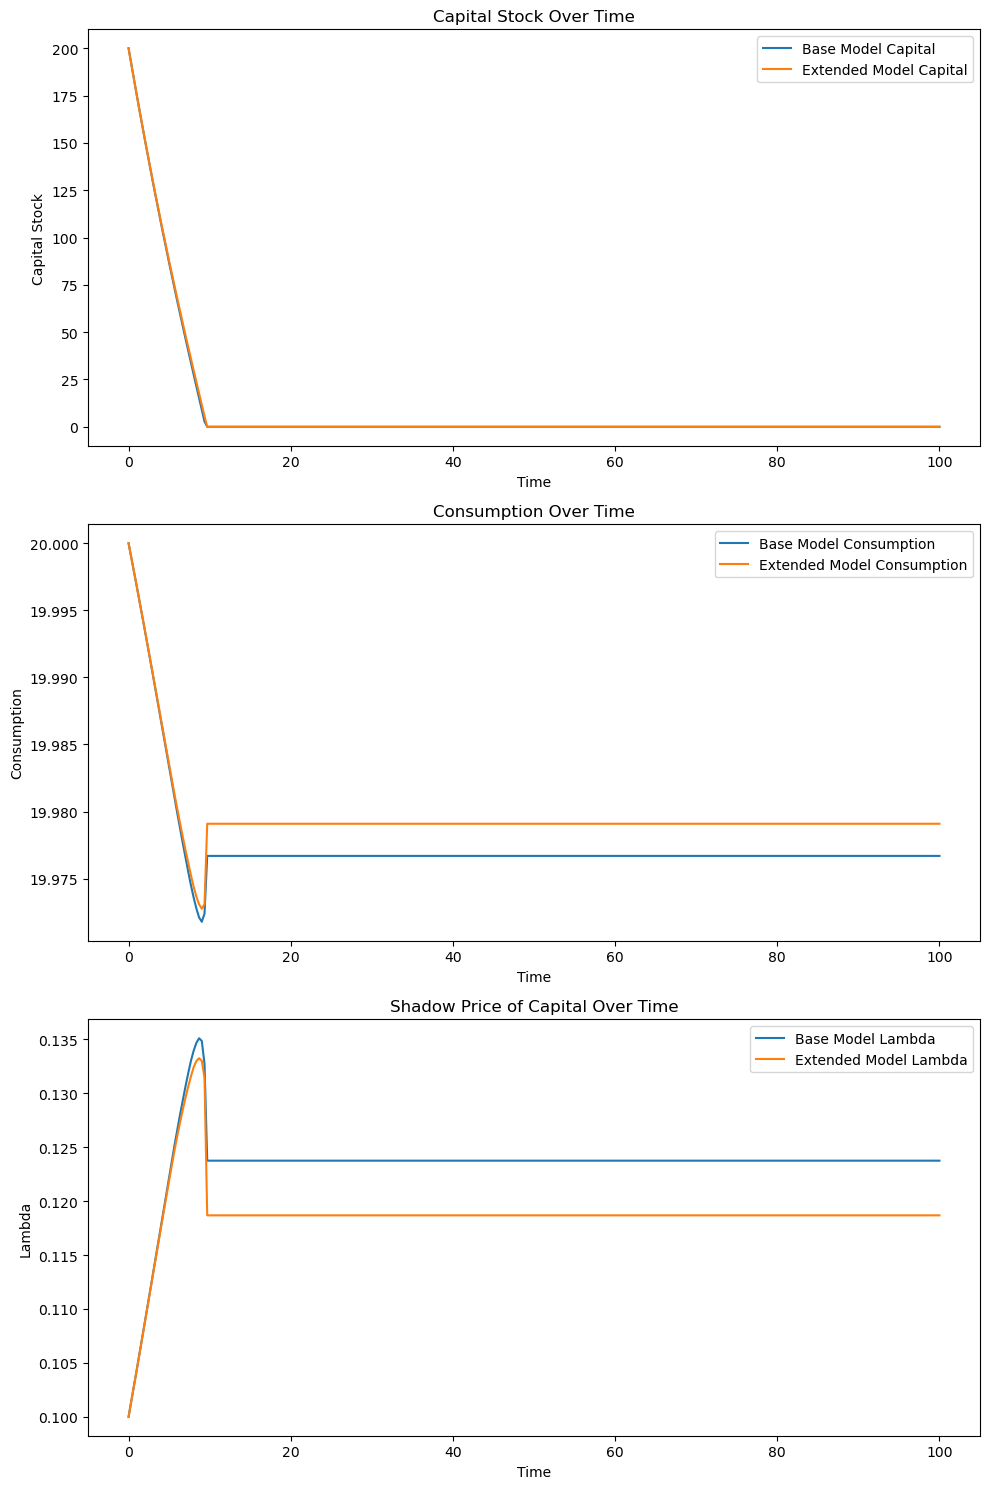

In [42]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Parameters
alpha = 0.3
delta = 0.05
rho = 0.02
theta = 2.0
n = 0.01
tech_growth = 0.02  # Technological growth rate

# Production function with technology factor
def production_with_tech(K, alpha, tech_growth, t):
    A = np.exp(tech_growth * t)  # Exponential growth of technology
    return A * K**alpha

# RCK system differential equations with added safety checks
def rck_system(t, z, alpha, delta, rho, theta, tech_growth):
    K, c, lam = z
    if K < 0 or c < 0:  # Prevent negative values which can cause NaNs or Infs
        return [0, 0, 0]  # Stop integration in an unphysical state
    Y = production_with_tech(K, alpha, tech_growth, t)
    dot_K = Y - c - delta * K
    dot_c = (lam / theta) * (alpha * Y / K - rho - delta)
    dot_lam = -lam * ((alpha * Y / K) - delta)
    return [dot_K, dot_c, dot_lam]

# Initial conditions
initial_conditions = [200, 20, 0.1]  # Initial capital, consumption, lambda

# Time span for the simulation
t_span = (0, 100)
t_eval = np.linspace(*t_span, 300)

# Solver options
solver_options = {'method': 'BDF', 'atol': 1e-6, 'rtol': 1e-3}

# Solve the base model (without technological growth)
base_solution = solve_ivp(rck_system, t_span, initial_conditions, args=(alpha, delta, rho, theta, 0), t_eval=t_eval, **solver_options)

# Solve the extended model (with technological growth)
extended_solution = solve_ivp(rck_system, t_span, initial_conditions, args=(alpha, delta, rho, theta, tech_growth), t_eval=t_eval, **solver_options)

# Plotting results for comparison
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Capital Stock
axes[0].plot(base_solution.t, base_solution.y[0], label='Base Model Capital')
axes[0].plot(extended_solution.t, extended_solution.y[0], label='Extended Model Capital')
axes[0].set_title('Capital Stock Over Time')
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Capital Stock')
axes[0].legend()

# Consumption
axes[1].plot(base_solution.t, base_solution.y[1], label='Base Model Consumption')
axes[1].plot(extended_solution.t, extended_solution.y[1], label='Extended Model Consumption')
axes[1].set_title('Consumption Over Time')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Consumption')
axes[1].legend()

# Shadow Price of Capital
axes[2].plot(base_solution.t, base_solution.y[2], label='Base Model Lambda')
axes[2].plot(extended_solution.t, extended_solution.y[2], label='Extended Model Lambda')
axes[2].set_title('Shadow Price of Capital Over Time')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Lambda')
axes[2].legend()

plt.tight_layout()
plt.show()


# Conclusion

Add concise conclusion. 